In [5]:
import io 
import pandas as pd
data=pd.read_csv('liar_data.csv')

print(type(data))
print(data.head())

<class 'pandas.core.frame.DataFrame'>
   label                                          statement  \
0      0  Says the Annies List political group supports ...   
1      0  When did the decline of coal start? It started...   
2      0  Hillary Clinton agrees with John McCain "by vo...   
3      0  The Chicago Bears have had more starting quart...   
4      0  I'm the only person on this stage who has work...   

                              subject         speaker  \
0                            abortion    dwayne-bohac   
1  energy,history,job-accomplishments  scott-surovell   
2                      foreign-policy    barack-obama   
3                           education       robin-vos   
4                              ethics    barack-obama   

            speaker_job_title state_info       party  \
0        State representative      Texas  republican   
1              State delegate   Virginia    democrat   
2                   President   Illinois    democrat   
3  Wisconsin Ass

In [6]:
data

,label,statement,subject,speaker,speaker_job_title,state_info,party,context
0,0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,a mailer
1,0,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,a floor speech.
2,0,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,Denver
3,0,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,a an online opinion-piece
4,0,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,"a Democratic debate in Philadelphia, Pa."
...,...,...,...,...,...,...,...,...
8433,1,Says U.S. Rep. Charles Bass wants to privatize...,social-security,ann-mclane-kuster,Attorney,New Hampshire,democrat,"an ad, “Janice,” released September 6, 2012"
8434,0,"In the past two years, Democrats have spent mo...","federal-budget,history",eric-cantor,House Majority Leader,Virginia,republican,an interview on Comedy Central's Daily Show wi...
8435,0,"For the first time in more than a decade, impo...","energy,oil-spill,trade",barack-obama,President,Illinois,democrat,a press conference
8436,0,Says Donald Trump has bankrupted his companies...,candidates-biography,hillary-clinton,Presidential candidate,New York,democrat,a speech on the economy


In [7]:
data.columns


Index(['label', 'statement', 'subject', 'speaker', 'speaker_job_title',
       'state_info', 'party', 'context'],
      dtype='object')

In [8]:
data.dropna(inplace=True)

In [9]:
data.shape

(8438, 8)

In [10]:
"""
data preprocessing done 
spiltting dataset as 90 10 10 
"""



'\ndata preprocessing done \nspiltting dataset as 90 10 10 \n'

In [11]:
dataliar_y=data.label
dataliar_x=data.drop(columns=['label'])
print( dataliar_x.shape)
print (dataliar_y.shape)

(8438, 7)
(8438,)


In [12]:
#train test split to form test from megaset
from sklearn.model_selection import train_test_split

X_train_temp, liar_test_x, y_train_temp, liar_test_y = train_test_split(dataliar_x,dataliar_y,test_size=0.1,random_state=12)
print(X_train_temp.shape)
print(liar_test_x.shape)

# mega_test_x : Final testing file with statements
# mega_test_y : Final testing file with ratings

liar_train_x, liar_dev_x, liar_train_y, liar_dev_y = train_test_split(X_train_temp,y_train_temp,test_size=844,random_state=12)

print(liar_train_x.shape)
print(liar_dev_x.shape)

# mega_train_x : Training file with statements
# mega_train_y : Training file with ratings
# mega_dev_x   : Development testing file with statements
# mega_dev_y   : Development testing file with ratings
print(type(liar_train_x))
print(liar_train_y.shape)
print("Final size of train/dev/test : ",liar_train_x.shape,"/",liar_dev_x.shape,"/",liar_test_x.shape)

(7594, 7)
(844, 7)
(6750, 7)
(844, 7)
<class 'pandas.core.frame.DataFrame'>
(6750,)
Final size of train/dev/test :  (6750, 7) / (844, 7) / (844, 7)


In [13]:
"""
function to tokenize and pad
"""
import tensorflow
import pandas as pd
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

Using TensorFlow backend.


In [14]:
def tokpad(train_x,dev_x):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_x)


    train_text = tokenizer.texts_to_sequences(train_x)
    dev_text = tokenizer.texts_to_sequences(dev_x)

    vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
    print('vocab size ',vocab_size)

    maxlen_text =0
    for i in train_x:
        if(len(i)>maxlen_text):
            maxlen_text=len(i)
    print('maxlen ',maxlen_text)

    train_padtext = pad_sequences(train_text, padding='post', maxlen=maxlen_text)
    dev_padtext = pad_sequences(dev_text, padding='post', maxlen=maxlen_text)

    print('train')
    print(train_padtext.shape)
    print('dev')
    print(dev_padtext.shape)
    print(train_padtext[1, :])

    return train_padtext,dev_padtext

In [15]:
"""
Index(['label', 'statement', 'subject', 'speaker', 'speaker_job_title',
       'state_info', 'party', 'context'],
      dtype='object')
  """

"\nIndex(['label', 'statement', 'subject', 'speaker', 'speaker_job_title',\n       'state_info', 'party', 'context'],\n      dtype='object')\n  "

In [16]:
#passing subject attribute to tokpad
train_padtext_sub,dev_padtext_sub=tokpad(liar_train_x.subject,liar_dev_x.subject)


vocab size  178
maxlen  203
train
(6750, 203)
dev
(844, 203)
[109 110   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0]


In [17]:
#passing state attribute to tokpad
train_padtext_state,dev_padtext_state=tokpad(liar_train_x.statement,liar_dev_x.statement)

vocab size  9804
maxlen  2099
train
(6750, 2099)
dev
(844, 2099)
[  11 1307    1 ...    0    0    0]


In [18]:
#passing speaker attribute to tokpad
train_padtext_spk,dev_padtext_spk=tokpad(liar_train_x.speaker,liar_dev_x.speaker)

vocab size  2063
maxlen  50
train
(6750, 50)
dev
(844, 50)
[78 69  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]


In [19]:
#passing speaker_job_title attribute to tokpad
train_padtext_sjt,dev_padtext_sjt=tokpad(liar_train_x.speaker_job_title,liar_dev_x.speaker_job_title)

vocab size  1046
maxlen  100
train
(6750, 100)
dev
(844, 100)
[24 47 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]


In [20]:
#passing state_info attribute to tokpad
train_padtext_stinfo,dev_padtext_stinfo=tokpad(liar_train_x.state_info,liar_dev_x.state_info)

vocab size  75
maxlen  49
train
(6750, 49)
dev
(844, 49)
[30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]


In [21]:
#passing party attribute to tokpad
train_padtext_pty,dev_padtext_pty=tokpad(liar_train_x.party,liar_dev_x.party)

vocab size  29
maxlen  28
train
(6750, 28)
dev
(844, 28)
[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [22]:
#passing context attribute to tokpad
train_padtext_cnt,dev_padtext_cnt=tokpad(liar_train_x.context,liar_dev_x.context)

vocab size  1958
maxlen  100
train
(6750, 100)
dev
(844, 100)
[303   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [23]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [36]:
#with kernel and bias regularizer 
#more agressive
#model1
from keras.layers import Embedding
from keras.layers import concatenate
from keras.layers import GlobalMaxPool1D
from keras.layers import Input, Dense,Dropout
from keras.models import Model
from keras.regularizers import l2
from keras.layers.convolutional import Conv1D    


embedding_dim = 25
h1=int(2/3*175)
h2=int(2/3*h1)
print(h1,h2)

sjtitle_in = Input(shape=(100,), name='sjtitle_in')
speaker_in = Input(shape=(50,), name='speaker_in')
text_in = Input(shape=(2099,), name='text_in')
subject_in = Input(shape=(203,), name='subject_in')
state_in = Input(shape=(49,), name='state_in')
party_in = Input(shape=(28,), name='party_in')
context_in = Input(shape=(100,), name='context_in')

#input dim = vocab size
#input length = maxlen
sjtitle_embed = Embedding(output_dim=embedding_dim, input_dim=1046, input_length=100)(sjtitle_in)
speaker_embed = Embedding(output_dim=embedding_dim, input_dim=2063, input_length=50)(speaker_in)
text_embed = Embedding(output_dim=embedding_dim, input_dim=9804, input_length=2099)(text_in)
subject_embed = Embedding(output_dim=embedding_dim, input_dim=178, input_length=203)(subject_in)
state_embed = Embedding(output_dim=embedding_dim, input_dim=75, input_length=49)(state_in)
party_embed = Embedding(output_dim=embedding_dim, input_dim=29, input_length=28)(party_in)
context_embed = Embedding(output_dim=embedding_dim, input_dim=1958, input_length=100)(context_in)



sjt=Conv1D(h1,kernel_size=(3) ,activation='relu')(sjtitle_embed)
spe=Conv1D(h1,kernel_size=(3) ,activation='relu')(speaker_embed)
text=Conv1D(h1,kernel_size=(3) ,activation='relu')(text_embed)
sub=Conv1D(h1,kernel_size=(3) ,activation='relu')(subject_embed)
sta=Conv1D(h1,kernel_size=(3) ,activation='relu')(state_embed)
par=Conv1D(h1,kernel_size=(3) ,activation='relu')(party_embed)
con=Conv1D(h1,kernel_size=(3) ,activation='relu')(context_embed)





sjtitle_pool = GlobalMaxPool1D()(sjt)
speaker_pool = GlobalMaxPool1D()(spe)
text_pool = GlobalMaxPool1D()(text)
subject_pool = GlobalMaxPool1D()(sub)
state_pool = GlobalMaxPool1D()(sta)
party_pool = GlobalMaxPool1D()(par)
context_pool = GlobalMaxPool1D()(con)


all_d = concatenate([sjtitle_pool, speaker_pool,text_pool,subject_pool,state_pool,party_pool,context_pool])

d1 = Dense(h1, activation='relu',kernel_regularizer=l2(0.1), bias_regularizer=l2(0.1),activity_regularizer=l2(0.1))(all_d)
drop1=Dropout(0.3)(d1)

op = Dense(1, activation='sigmoid', name='op')(drop1)




model1 = Model(inputs=[sjtitle_in,speaker_in,text_in,subject_in,state_in,party_in,context_in], outputs=[op])

model1.summary()

116 77
Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
sjtitle_in (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
speaker_in (InputLayer)         (None, 50)           0                                            
__________________________________________________________________________________________________
text_in (InputLayer)            (None, 2099)         0                                            
__________________________________________________________________________________________________
subject_in (InputLayer)         (None, 203)          0                                            
_____________________________________________________________________________________

C:\Users\Rahul\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6750 samples, validate on 844 samples
Epoch 1/20
6750/6750 [==============================] - 23s 3ms/step - loss: 1.7435 - acc: 0.7360 - val_loss: 0.6123 - val_acc: 0.7417
Epoch 2/20
6750/6750 [==============================] - 23s 3ms/step - loss: 0.6057 - acc: 0.7369 - val_loss: 0.6035 - val_acc: 0.7417
Epoch 3/20
6750/6750 [==============================] - 23s 3ms/step - loss: 0.5870 - acc: 0.7369 - val_loss: 0.5920 - val_acc: 0.7417
Epoch 4/20
6750/6750 [==============================] - 23s 3ms/step - loss: 0.5495 - acc: 0.7369 - val_loss: 0.6309 - val_acc: 0.7417
Epoch 5/20
6750/6750 [==============================] - 23s 3ms/step - loss: 0.4595 - acc: 0.8316 - val_loss: 0.7452 - val_acc: 0.6149
Epoch 6/20
6750/6750 [==============================] - 23s 3ms/step - loss: 0.3376 - acc: 0.9430 - val_loss: 0.8016 - val_acc: 0.6469
Epoch 7/20
6750/6750 [==============================] - 23s 3ms/step - loss: 0.2482 - acc: 0.9809 - val_loss: 0.8871 - val_acc: 0.6173
Epoch 8/

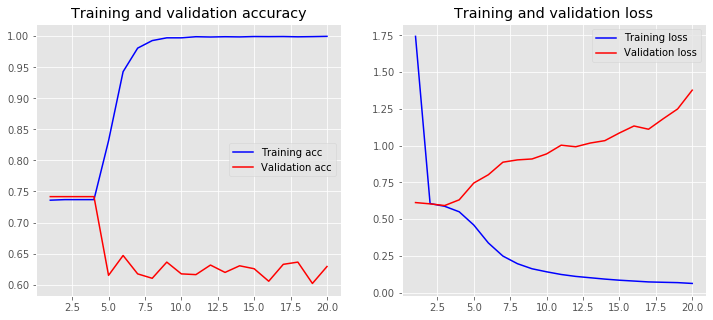

In [37]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['acc'])
h=model1.fit({'sjtitle_in':train_padtext_sjt,'speaker_in':train_padtext_spk,'text_in':train_padtext_state,'subject_in':train_padtext_sub,'state_in':train_padtext_stinfo,'party_in':train_padtext_pty,'context_in':train_padtext_cnt},{'op': liar_train_y},
          epochs=20, batch_size=16,validation_data=({'sjtitle_in':dev_padtext_sjt,'speaker_in':dev_padtext_spk,'text_in':dev_padtext_state,'subject_in':dev_padtext_sub,'state_in':dev_padtext_stinfo,'party_in':dev_padtext_pty,'context_in':dev_padtext_cnt},{'op': liar_dev_y}))
plot_history(h)

In [ ]:
#reducing the accuracy by increasing regularizers lead to the same accuracy as that of DNN